In [1]:
import pandas as pd
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

from src.prediction_model_utils.create_submission import create_submission_csv
from src.prediction_model_utils.data_massager import message_training_data, message_test_data
from src.prediction_model_utils.data_retriever import get_x, get_y

titanic_training_df: DataFrame = pd.read_csv("../data/train.csv")
titanic_training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic_features_df: DataFrame = message_training_data(titanic_training_df)
titanic_features_df.head()

,Survived,Sex,Age,Pclass,Sex_Encoded
0,0,male,22.0,3,0
1,1,female,38.0,1,1
2,1,female,26.0,3,1
3,1,female,35.0,1,1
4,0,male,35.0,3,0


In [3]:
training_x = get_x(titanic_features_df)
training_y = get_y(titanic_features_df)

decision_tree_overfitted = tree.DecisionTreeClassifier()
decision_tree_overfitted = decision_tree_overfitted.fit(
    training_x,
    training_y
)

[Text(0.47954601377952755, 0.9705882352941176, 'x[0] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.1655388779527559, 0.9117647058823529, 'x[1] <= 6.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(0.3225424458661417, 0.9411764705882353, 'True  '),
 Text(0.015748031496062992, 0.8529411764705882, 'x[2] <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.007874015748031496, 0.7941176470588235, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.023622047244094488, 0.7941176470588235, 'x[1] <= 0.71\ngini = 0.49\nsamples = 14\nvalue = [8, 6]'),
 Text(0.015748031496062992, 0.7352941176470589, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.031496062992125984, 0.7352941176470589, 'x[1] <= 2.5\ngini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(0.015748031496062992, 0.6764705882352942, 'x[1] <= 1.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.007874015748031496, 0.6176470588235294, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.

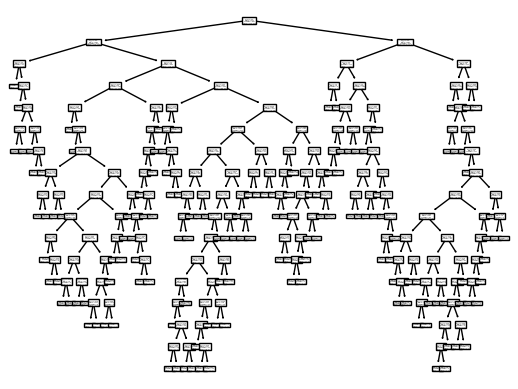

In [4]:
tree.plot_tree(decision_tree_overfitted)

In [5]:
overfitted_train_predictions = decision_tree_overfitted.predict(training_x)
overfitted_train_accuracy = accuracy_score(training_y, overfitted_train_predictions)

print(f"Overfitted Training accuracy: {overfitted_train_accuracy}")

Overfitted Training accuracy: 0.877665544332211


In [6]:
decision_tree_fitted = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=20, min_samples_leaf=10)
decision_tree_fitted = decision_tree_fitted.fit(
    training_x,
    training_y
)

[Text(0.47580645161290325, 0.9166666666666666, 'x[0] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.1532258064516129, 0.75, 'x[1] <= 6.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(0.31451612903225806, 0.8333333333333333, 'True  '),
 Text(0.06451612903225806, 0.5833333333333334, 'x[2] <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.03225806451612903, 0.4166666666666667, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.0967741935483871, 0.4166666666666667, 'gini = 0.49\nsamples = 14\nvalue = [8, 6]'),
 Text(0.24193548387096775, 0.5833333333333334, 'x[2] <= 1.5\ngini = 0.28\nsamples = 553\nvalue = [460, 93]'),
 Text(0.16129032258064516, 0.4166666666666667, 'x[1] <= 53.0\ngini = 0.46\nsamples = 120\nvalue = [77, 43]'),
 Text(0.0967741935483871, 0.25, 'x[1] <= 47.5\ngini = 0.483\nsamples = 98\nvalue = [58, 40]'),
 Text(0.06451612903225806, 0.08333333333333333, 'gini = 0.469\nsamples = 85\nvalue = [53, 32]'),
 Text(0.12903225806451613, 0

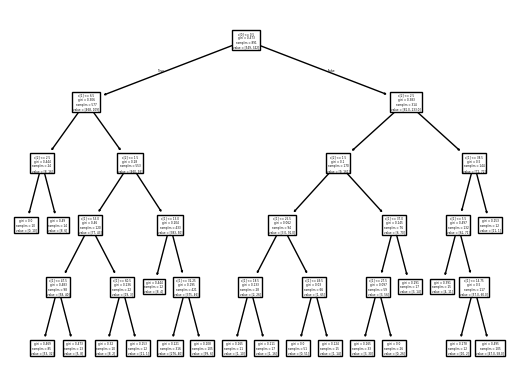

In [7]:
tree.plot_tree(decision_tree_fitted)

In [8]:
fitted_train_predictions = decision_tree_fitted.predict(training_x)
fitted_train_accuracy = accuracy_score(training_y, fitted_train_predictions)

print(f"Fitted Training accuracy: {fitted_train_accuracy}")

Fitted Training accuracy: 0.8215488215488216


In [9]:
randomForestClassifier = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=20, min_samples_leaf=10)
randomForestClassifier.fit(training_x, training_y)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,20
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


[Text(0.3892857142857143, 0.9166666666666666, 'x[1] <= 16.5\ngini = 0.477\nsamples = 554\nvalue = [542, 349]'),
 Text(0.11428571428571428, 0.75, 'x[0] <= 0.5\ngini = 0.472\nsamples = 66\nvalue = [42, 68]'),
 Text(0.2517857142857143, 0.8333333333333333, 'True  '),
 Text(0.05714285714285714, 0.5833333333333334, 'x[1] <= 6.5\ngini = 0.493\nsamples = 28\nvalue = [23.0, 18.0]'),
 Text(0.02857142857142857, 0.4166666666666667, 'gini = 0.455\nsamples = 14\nvalue = [7, 13]'),
 Text(0.08571428571428572, 0.4166666666666667, 'gini = 0.363\nsamples = 14\nvalue = [16, 5]'),
 Text(0.17142857142857143, 0.5833333333333334, 'x[2] <= 2.5\ngini = 0.399\nsamples = 38\nvalue = [19, 50]'),
 Text(0.14285714285714285, 0.4166666666666667, 'gini = 0.17\nsamples = 14\nvalue = [3, 29]'),
 Text(0.2, 0.4166666666666667, 'x[1] <= 5.5\ngini = 0.491\nsamples = 24\nvalue = [16, 21]'),
 Text(0.17142857142857143, 0.25, 'gini = 0.388\nsamples = 11\nvalue = [5, 14]'),
 Text(0.22857142857142856, 0.25, 'gini = 0.475\nsamples 

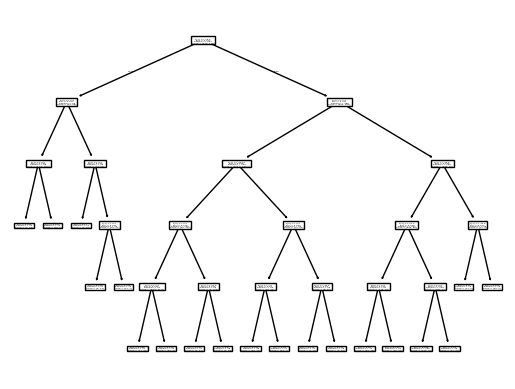

In [10]:
tree.plot_tree(randomForestClassifier.estimators_[0])

In [11]:
forest_train_predictions = randomForestClassifier.predict(training_x)
forest_train_accuracy = accuracy_score(training_y, forest_train_predictions)

print(f"Forest Training accuracy: {forest_train_accuracy}")

Forest Training accuracy: 0.8170594837261503


In [12]:
titanic_test_df: DataFrame = pd.read_csv("../data/test.csv")
titanic_test_df = message_test_data(titanic_test_df)
titanic_test_df.head()

,PassengerId,Sex,Age,Pclass,Sex_Encoded
0,892,male,34.5,3,0
1,893,female,47.0,3,1
2,894,male,62.0,2,0
3,895,male,27.0,3,0
4,896,female,22.0,3,1


In [13]:
test_x = get_x(titanic_test_df)

random_forest_survival_prediction = randomForestClassifier.predict(test_x)
random_forest_submission_df = create_submission_csv(titanic_test_df, random_forest_survival_prediction)
random_forest_submission_df.head()

ValueError: 2

In [ ]:
decision_tree_fitted_survival_prediction = decision_tree_fitted.predict(test_x)
decision_tree_fitted_submission_df = create_submission_csv(titanic_test_df, decision_tree_fitted_survival_prediction)
decision_tree_fitted_submission_df.head()